In [7]:
import os
import pandas as pd
import numpy as np
path_root = os.path.dirname(os.getcwd())
path_data1 = os.path.join(path_root, "18752project")
path_data = os.path.join(path_data1, "data")
preprocessed_filename_data = os.path.join(path_data, "preprocessed_weather_dataset.csv")
label_filename_data = os.path.join(path_data, "weather_prediction_sleep_labels.csv")

In [24]:
data = pd.read_csv(preprocessed_filename_data)
label = pd.read_csv(label_filename_data)

data_with_labels = pd.merge(data, label, on='DATE')
data.head()

,DATE,MONTH,cloud_cover,wind_speed,wind_gust,humidity,precipitation,sunshine,temp_mean,temp_min,temp_max
0,20100101,1,8,3.9,8.2,0.89,0.02,0.0,-1.1,-2.8,-0.6
1,20100102,1,7,3.6,8.8,0.88,0.45,1.6,-1.5,-5.8,0.6
2,20100103,1,8,3.0,7.7,0.92,0.00,0.3,-3.1,-5.5,0.4
3,20100104,1,7,2.7,8.2,0.88,0.01,1.1,-4.1,-6.9,-2.6
4,20100105,1,7,3.6,7.2,0.87,0.00,0.0,-2.7,-4.5,-1.5


In [19]:
label.head()

,DATE,sleep_weather
0,20100101,True
1,20100102,True
2,20100103,True
3,20100104,True
4,20100105,True


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)

# Apply PCA, reducing to a reasonable number of components
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

# Display explained variance ratio
print(pca.n_components_)
explained_variance_ratio = pca.explained_variance_ratio_
principal_df.head(), explained_variance_ratio


6


(   Principal Component 1  Principal Component 2  Principal Component 3  \
 0              -3.563936              -1.504459               0.026747   
 1              -3.456968              -1.523473               0.329578   
 2              -3.759599              -2.026240              -0.239729   
 3              -3.712699              -2.475109               0.167810   
 4              -3.550233              -2.089070               0.127723   
 
    Principal Component 4  Principal Component 5  Principal Component 6  
 0               1.094523              -0.772562              -0.030693  
 1               1.327234               0.527391               0.067632  
 2               1.131873              -0.570025              -0.098591  
 3               0.978434              -0.247563               0.009593  
 4               0.983949              -0.542366               0.002482  ,
 array([0.38156564, 0.23196647, 0.16127856, 0.09065101, 0.0741954 ,
        0.02894433]))

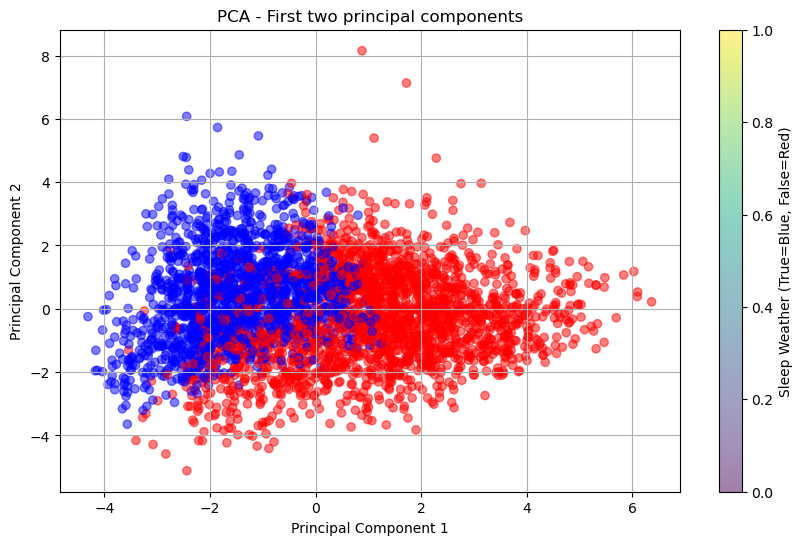

In [22]:
import matplotlib.pyplot as plt

# Plotting the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'],
            c=data_with_labels['sleep_weather'].map({True: 'blue', False: 'red'}), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First two principal components')
plt.colorbar(label='Sleep Weather (True=Blue, False=Red)')
plt.grid(True)
plt.show()

# Confirmed that a PCA reduces the data to 6 dimensions while retaining 95% of its variance.

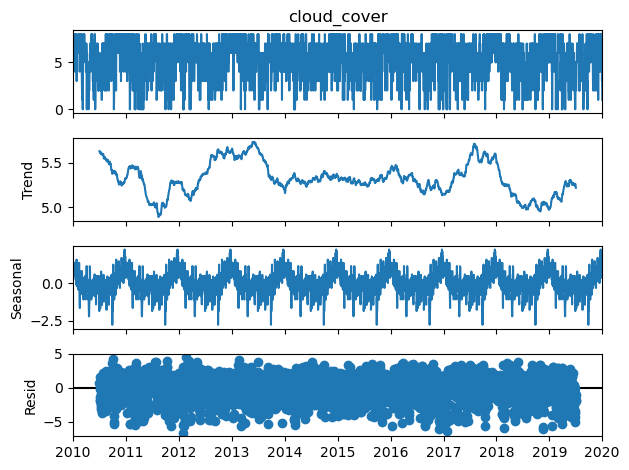

In [25]:
### TIME SERIES DECOMPOSITIONS ###

from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the 'DATE' column to datetime format and set as index
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.set_index('DATE', inplace=True)

# Assume a periodicity of 365 days per year for potential annual seasonality
decomposition = seasonal_decompose(data['cloud_cover'], model='additive', period=365)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition
decomposition_plot = decomposition.plot()
plt.show()


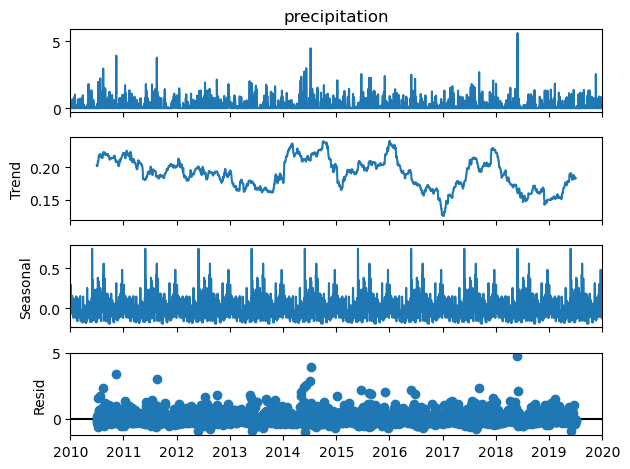

In [26]:
decomposition_precip = seasonal_decompose(data['precipitation'], model='additive', period=365)

decomposition_precip_plot = decomposition_precip.plot()
plt.show()


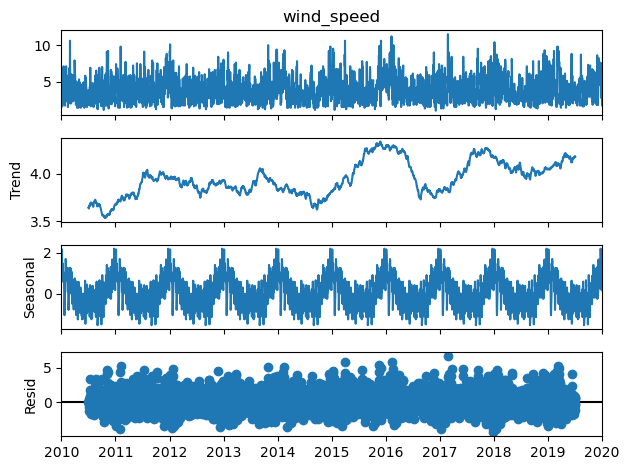

In [27]:
decomposition_windspd = seasonal_decompose(data['wind_speed'], model='additive', period=365)


decomposition_windspd_plot = decomposition_windspd.plot()
plt.show()


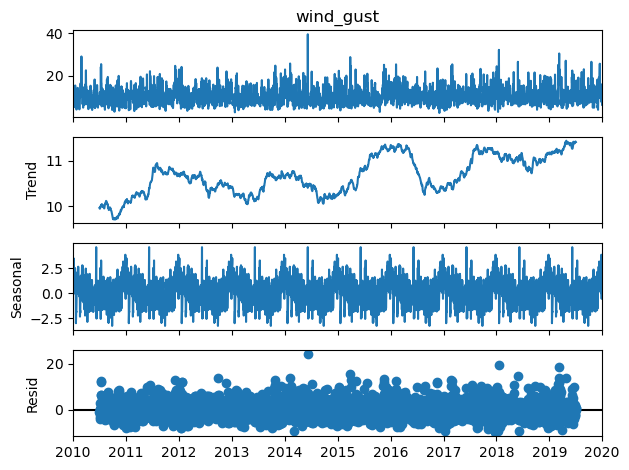

In [28]:
decomposition_windgust = seasonal_decompose(data['wind_gust'], model='additive', period=365)

decomposition_windgust_plot = decomposition_windgust.plot()
plt.show()